In [1]:
import urllib.request
from bs4 import BeautifulSoup as soup
import requests
import re
import pandas as pd
import dataframe_image as dfi
import seaborn as sns
import matplotlib.pyplot as plt
import glob

rallyname = 'Korinthou'
raceDate = '16-06-2024'
surface = 'Gravel'
competition = 'Greek Championship'

link = 'https://www.ewrc-results.com/results/89201-rally-korinthou-2024/?s='
startat, no_ss=462926, int(5)

canceled = []


stages = [number for number in range(no_ss)]

rally_23 = []
overall_23 = []

In [2]:
if canceled:
    for j in canceled: stages.remove(j-1)

In [3]:
for ss in stages:
    val= startat + ss
    ss_a = str(val)
    
    my_url11 = link + ss_a
    req = urllib.request.Request(my_url11, headers={'User-Agent': 'Mozilla/5.0'})
    uClient11 = urllib.request.urlopen(req)
    page_html11 = uClient11.read()
    uClient11.close()
    data = pd.read_html(page_html11)[0]
    data1 = pd.read_html(page_html11)[1]
    data.columns=['Pos.', 'No', 'Crew', 'Gr/Cl','ss_time', 'Diff', 'Speed']
    data1.columns=['Pos.', 'No', 'Crew', 'Gr/Cl','total_time', 'Diff', 'Speed']
    data['ss']=ss+1
    data1['ss']=ss+1
    equal = '=' in data['Pos.'].unique()
    if equal:
        data['Pos.'] = data['Pos.'].replace('=', method='ffill')
        data['Pos.'] = data['Pos.'].astype(str).astype(float)
    equal = '=' in data1['Pos.'].unique()
    if equal:
        data1['Pos.'] = data1['Pos.'].replace('=', method='ffill')
        data1['Pos.'] = data1['Pos.'].astype(str).astype(float)
    #print(data.dtypes)
    #print(data1)
    rally_23.append(data) 
    overall_23.append(data1)

C:\Users\ilias\AppData\Local\Temp\ipykernel_42844\3609136228.py:18: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['Pos.'] = data['Pos.'].replace('=', method='ffill')


In [4]:
rally2023_stages = pd.concat(rally_23, axis=0)
rally_overall = pd.concat(overall_23, axis=0)
rally_overall.tail(50)

,Pos.,No,Crew,Gr/Cl,total_time,Diff,Speed,ss
21,22. −1,#42,Kassimis Ioannis - Dikopoulou C. Toyota Yaris,C6 F2,47:07.43,+7:13.45 +0.17,68.1 8.10,4
22,23. +1,#41,Giokaris S. - Mourtzoukos G. Toyota Starlet EP91,C6 F2,47:21.33,+7:27.35 +13.90,67.8 8.36,4
23,24. +1,#17,Davaris Nikos - Makris K. Mitsubishi Lancer E...,C2 N,47:34.21,+7:40.23 +12.88,67.5 8.60,4
24,25. +1,#25,Kalamaras Teo - Labrakis Dimitris Ford Fiesta...,C5 F2,48:03.56,+8:09.58 +29.35,66.8 9.15,4
25,26. +2,#5,Rendina Max - Inglesi Emanuele Škoda Fabia R5,C1,48:27.98,+8:34.00 +24.42,66.2 9.61,4
26,27.,#39,Panagiotopoulos M. - Ahtidas E. Toyota Yaris,C6 F2,49:20.27,+9:26.29 +52.29,65.1 10.6,4
27,28. +2,#33,Rinakis Manos - Palapanidi Sofia Opel Corsa D...,C2,50:21.80,+10:27.82 +1:01.53,63.7 11.7,4
28,29.,#37,Mavraganis A. - Tselepidis I. Toyota Corolla ...,C4 F2 E,50:48.05 1:00,+10:54.07 +26.25,64.5 12.2,4
29,30. +1,#36,Basdelis Andreas - Zotiadis K. Volkswagen Gol...,C3 F2 E,51:16.46,+11:22.48 +28.41,62.6 12.8,4
30,31. +2,#38,Moustakas Spiros - Lakassas A. Mazda 323,C2 N,51:54.62,+12:00.64 +38.16,61.8 13.5,4


In [5]:
rally2023_stages = pd.concat(rally_23, axis=0)
rally2023_stages['Pos.'] = rally2023_stages['Pos.'].astype(int)
#rally_overall['Pos.'] = rally_overall['Pos.'].astype(int)
#rally2023_stages['No'] = rally2023_stages['No.'].str[1:]
#rally2023_stages.to_csv('03_rally2023.csv', index=False)
rally2023_stages = rally2023_stages.fillna("-")
rally2023_stages['Race'] = rallyname
rally2023_stages['date'] = raceDate
rally2023_stages['surface'] = surface
rally2023_stages['competition'] = competition
rally2023_stages['Crew'] = rally2023_stages['Crew'].str[:14]
rally2023_stages['Gr/Cl'] = rally2023_stages['Gr/Cl'].str[:2]
rally_overall['Race'] = rallyname
rally_overall['date'] = raceDate
rally_overall['surface'] = surface
rally_overall['competition'] = competition
rally_overall['Crew'] = rally2023_stages['Crew'].str[:14]
rally_overall['Gr/Cl'] = rally2023_stages['Gr/Cl'].str[:2]
rally2023_stages = rally2023_stages.sort_values(by=['Race', 'ss'])
rally2023_stages['cou']= rally2023_stages.groupby(['Race', 'ss']).cumcount()+1
rally_overall['cPos']= rally_overall.groupby(['Race', 'ss']).cumcount()+1
rally_overall[['Stages_time', 'Penalty']] = rally_overall['total_time'].str.split(' ', expand=True)
rally_overall['Stages_t_s'], rally_overall['Stages_t_m'], rally_overall['Stages_t_h']= rally_overall['Stages_time'].str[-5:], rally_overall['Stages_time'].str[-8:-6].astype(int), rally_overall['Stages_time'].str[:-9]
rally_overall['Penalty_m'], rally_overall['Penalty_s'] = rally_overall['Penalty'].str[:-3], rally_overall['Penalty'].str[-2:]
rally_overall[['Diff_1st', 'Diff_Pre']] = rally_overall['Diff'].str.split(' +', expand=True)
rally_overall['Diff_1st'] = rally_overall['Diff_1st'].str.replace('+', '')
rally_overall = rally_overall.replace('',0)
rally_overall.fillna(0, inplace=True)
cols = ['Stages_t_h', 'Stages_t_m', 'Stages_t_s', 'Penalty_m', 'Penalty_s']
rally_overall[cols] = rally_overall[cols].apply(pd.to_numeric, errors='coerce', axis=1)
rally_overall['time'] = rally_overall['Stages_t_s'] +  rally_overall['Stages_t_m'] *60 + rally_overall['Stages_t_h'] *3600
#rally_overall.to_csv('trialData.csv', index=False)
rally_overall

,Pos.,No,Crew,Gr/Cl,total_time,Diff,Speed,ss,Race,date,...,Stages_time,Penalty,Stages_t_s,Stages_t_m,Stages_t_h,Penalty_m,Penalty_s,Diff_1st,Diff_Pre,time
0,1.0,#3,Amoutzas Giorg,C1,13:44.45,0,79.5,1,Korinthou,16-06-2024,...,13:44.45,0,44.45,13.0,0.0,0.0,0.0,0,0,824.45
1,2.0,#2,Papadimitriou,C1,13:50.16,+5.71 +5.71,79.0 0.31,1,Korinthou,16-06-2024,...,13:50.16,0,50.16,13.0,0.0,0.0,0.0,5.71,+5.71,830.16
2,3.0,#4,Kechagias G.,C1,13:51.95,+7.50 +1.79,78.8 0.41,1,Korinthou,16-06-2024,...,13:51.95,0,51.95,13.0,0.0,0.0,0.0,7.50,+1.79,831.95
3,4.0,#1,Serderidis Jou,C1,14:09.82,+25.37 +17.87,77.1 1.39,1,Korinthou,16-06-2024,...,14:09.82,0,9.82,14.0,0.0,0.0,0.0,25.37,+17.87,849.82
4,5.0,#8,Karanikolas E.,C2,14:11.49,+27.04 +1.67,77.0 1.48,1,Korinthou,16-06-2024,...,14:11.49,0,11.49,14.0,0.0,0.0,0.0,27.04,+1.67,851.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,29. +4,#48,Vassilopoulos,2,1:11:16.79,+17:50.43 +25.87,60.4 14.9,5,Korinthou,16-06-2024,...,1:11:16.79,0,16.79,11.0,1.0,0.0,0.0,17:50.43,+25.87,4276.79
29,30. +6,#46,Trikardos Dimi,2,1:13:08.13,+19:41.77 +1:51.34,58.8 16.5,5,Korinthou,16-06-2024,...,1:13:08.13,0,8.13,13.0,1.0,0.0,0.0,19:41.77,+1:51.34,4388.13
30,31. +7,#26,Moustakas Spir,C2,1:21:24.41,+27:58.05 +8:16.28,52.9 23.4,5,Korinthou,16-06-2024,...,1:21:24.41,0,24.41,21.0,1.0,0.0,0.0,27:58.05,+8:16.28,4884.41
31,32. +5,#34,Tsagarakis A.,C3,1:26:42.35 2:20,+33:15.99 +5:17.94,51.0 27.8,5,Korinthou,16-06-2024,...,1:26:42.35,2:20,42.35,26.0,1.0,2.0,20.0,33:15.99,+5:17.94,5202.35


In [6]:
rally2023_stageClass=rally2023_stages.drop(['No', 'Diff', 'Speed', 'ss_time', 'cou', 'date', 'surface', 'competition'], axis=1)
rally2023_stageTimes=rally2023_stages.drop(['No', 'Diff', 'Speed', 'cou', 'date', 'surface', 'competition', 'Pos.'], axis=1)
rally2023_stageClass['Pos.'] = rally2023_stageClass['Pos.'].astype(str)
rally2023_ClassView = rally2023_stageClass.set_index(['Crew','Gr/Cl','ss','Race'], drop=True).unstack('ss')
rally2023_TimeView = rally2023_stageTimes.set_index(['Crew','Gr/Cl', 'ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView = rally2023_ClassView.fillna("-")
rally2023_TimeView = rally2023_TimeView.fillna("-")

In [7]:
rally2023_stages[['time_mm','time_ss']] = rally2023_stages['ss_time'].str.split(':', expand=True)
#rally2023_stages['time_hh']= rally2023_stages['time_hh'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_mm']= rally2023_stages['time_mm'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_ss']= pd.to_numeric(rally2023_stages['time_ss'], errors='coerce')
rally2023_stages['time_SS_sec'] = rally2023_stages['time_mm']*60 + rally2023_stages['time_ss']
rally2023_stages = rally2023_stages.drop(['Pos.', 'No', 'ss_time', 'Diff',  'Speed', 'time_mm', 'time_ss'], axis=1)
rally2023_stages.to_csv( str(rallyname) + '_Stages_Times_Sec.csv',index=False)
rally2023_stages

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec
0,Amoutzas Giorg,C1,1,Korinthou,16-06-2024,Gravel,Greek Championship,1,824.45
1,Papadimitriou,C1,1,Korinthou,16-06-2024,Gravel,Greek Championship,2,830.16
2,Kechagias G.,C1,1,Korinthou,16-06-2024,Gravel,Greek Championship,3,831.95
3,Serderidis Jou,C1,1,Korinthou,16-06-2024,Gravel,Greek Championship,4,849.82
4,Karanikolas E.,C2,1,Korinthou,16-06-2024,Gravel,Greek Championship,5,851.49
...,...,...,...,...,...,...,...,...,...
28,Vassilopoulos,2,5,Korinthou,16-06-2024,Gravel,Greek Championship,29,1114.32
29,Trikardos Dimi,2,5,Korinthou,16-06-2024,Gravel,Greek Championship,30,1116.07
30,Moustakas Spir,C2,5,Korinthou,16-06-2024,Gravel,Greek Championship,31,1127.17
31,Tsagarakis A.,C3,5,Korinthou,16-06-2024,Gravel,Greek Championship,32,1818.18


In [8]:
min_value = rally2023_stages.groupby(['Race', 'ss'])['time_SS_sec'].min()
min_value_G = rally2023_stages.groupby(['Race', 'ss', 'Gr/Cl'])['time_SS_sec'].min()
#min_value = pd.DataFrame(min_value)

min_value2 =  pd.DataFrame(min_value)
min_value2_G =  pd.DataFrame(min_value_G)

min_value2_G = min_value2_G.rename(columns={'time_SS_sec' : 'min_time_Gr'})
min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2_G

min_time_Gr
Race      ss Gr/Cl             
Korinthou 1  2          1071.89
             4          1089.72
             C1          824.45
             C2          851.49
             C3          941.22
             C4          932.93
             C5          918.86
             C6          972.95
          2  2           496.81
             4           485.18
             C1          382.80
             C2          391.36
             C3          437.71
             C4          445.12
             C5          409.96
             C6          441.21
          3  2          1066.77
             4          1083.17
             C1          809.81
             C2          827.07
             C3          959.40
             C4          908.05
             C5          882.49
             C6          967.98
          4  2           499.38
             4           509.68
             C1          374.56
             C2          379.48
             C3          437.73
             C4          412.02
             C5          403.35
             C6          445.29
          5  2          1114.32
             4          1109.04
             C1          799.84
             C2          827.07
             C3         1022.79
             C4          989.34
             C5          919.16
             C6          982.74

In [9]:
ss_times_F_G = rally2023_stages.merge(min_value2_G, on=['Race', 'ss', 'Gr/Cl'])
ss_times_F = ss_times_F_G.merge(min_value2, on=['Race', 'ss'])
ss_times_F['diff']=ss_times_F['time_SS_sec'] - ss_times_F['min_time']
ss_times_F['diff_G']=ss_times_F['time_SS_sec'] - ss_times_F['min_time_Gr']
ss_times_F['diff_G%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time_Gr'])/ss_times_F['min_time_Gr']*100
ss_times_F['SS.']=ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
ss_times_F

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time_Gr,min_time,diff,diff_G,diff_G%,SS.
0,Amoutzas Giorg,C1,1,Korinthou,16-06-2024,Gravel,Greek Championship,1,824.45,824.45,824.45,0.00,0.00,0.000000,01
1,Papadimitriou,C1,1,Korinthou,16-06-2024,Gravel,Greek Championship,2,830.16,824.45,824.45,5.71,5.71,0.692583,01
2,Kechagias G.,C1,1,Korinthou,16-06-2024,Gravel,Greek Championship,3,831.95,824.45,824.45,7.50,7.50,0.909697,01
3,Serderidis Jou,C1,1,Korinthou,16-06-2024,Gravel,Greek Championship,4,849.82,824.45,824.45,25.37,25.37,3.077203,01
4,Rendina Max -,C1,1,Korinthou,16-06-2024,Gravel,Greek Championship,9,876.28,824.45,824.45,51.83,51.83,6.286615,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,Pantelakis Gio,C3,5,Korinthou,16-06-2024,Gravel,Greek Championship,27,1098.10,1022.79,799.84,298.26,75.31,7.363193,05
195,Tsagarakis A.,C3,5,Korinthou,16-06-2024,Gravel,Greek Championship,32,1818.18,1022.79,799.84,1018.34,795.39,77.766697,05
196,Dodos Giorgos,4,5,Korinthou,16-06-2024,Gravel,Greek Championship,28,1109.04,1109.04,799.84,309.20,0.00,0.000000,05
197,Vassilopoulos,2,5,Korinthou,16-06-2024,Gravel,Greek Championship,29,1114.32,1114.32,799.84,314.48,0.00,0.000000,05


In [10]:
Group = 'C'
#ss_times_WRC = ss_times_F[ss_times_F['Gr/Cl'].str.contains(Group)]
ss_times_WRC = ss_times_F[ss_times_F['Gr/Cl'].str.contains('|'.join(['C1', 'C2', 'C3', 'C4', 'C5', 'C6']))]
#ss_times_WRC = ss_times_F[ss_times_F['Gr/Cl'].str.contains('|'.join(['C1', 'C2']))]
#ss_times_WRC.to_csv(str(rallyname) + str(Group) + '.csv')
ss_times_WRC.to_csv('test2a.csv')

In [11]:
ss_times_F3 =ss_times_WRC.drop(['Gr/Cl','time_SS_sec','cou', 'ss'], axis=1)
#ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff_G', index='Crew', columns=['Race', 'SS.'])
ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff_G', index='Crew', columns=['SS.'])
ss_times_F4

SS.,01,02,03,04,05
Crew,,,,,
Amoutzas Giorg,0.00,0.00,1.50,0.86,13.17
Antoniou K. -,0.00,0.00,NaN,NaN,NaN
Basdelis Andre,100.24,34.28,96.68,69.20,NaN
Baxevanakis A.,116.65,NaN,NaN,NaN,NaN
Chatzidakis V.,168.91,67.28,144.99,87.25,NaN
Chatzimarkos P,4.27,1.90,0.00,0.00,0.00
Dakaris Ioanni,131.61,44.36,137.00,83.44,74.09
Davaris Nikos,139.35,64.05,126.25,75.16,210.89
Delaportas Gio,35.76,9.53,30.06,11.36,30.06


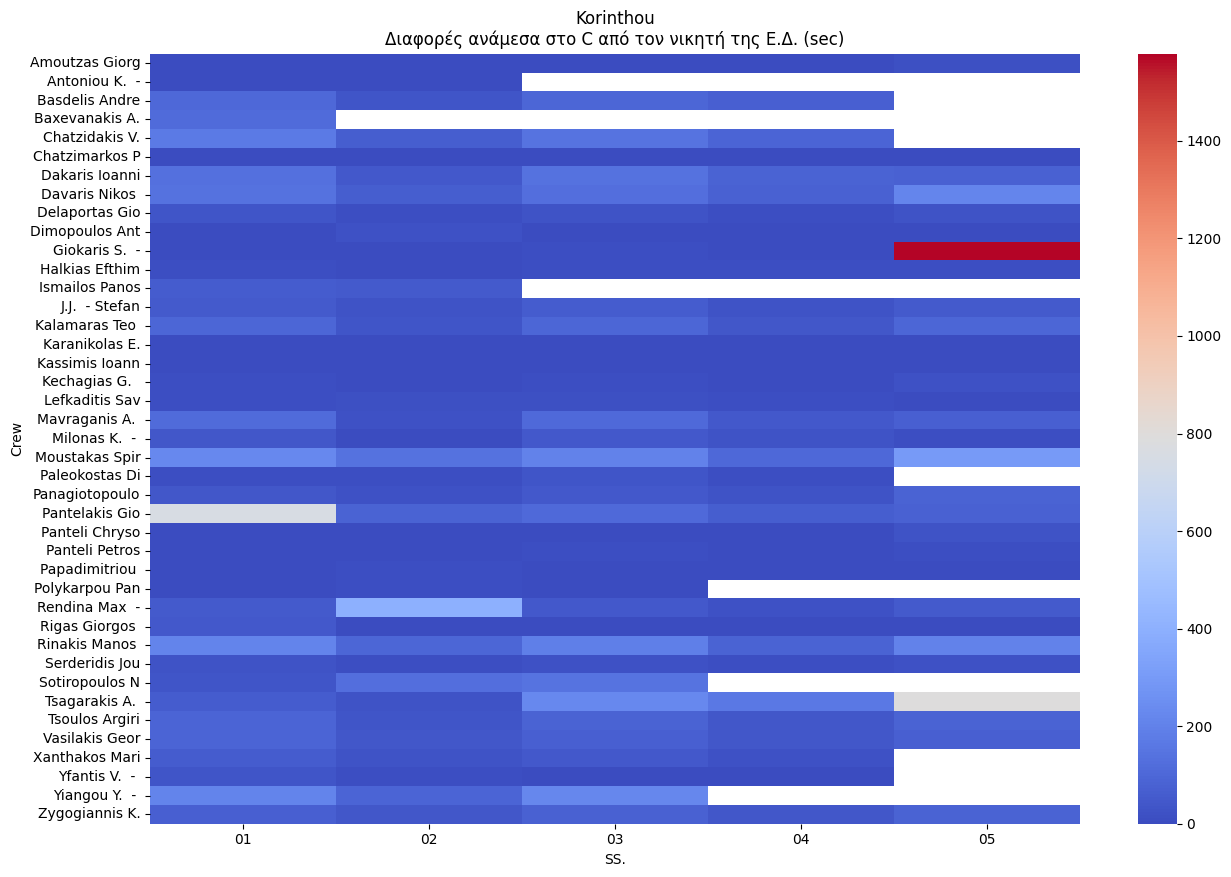

In [12]:
fig,ax = plt.subplots()
#fig.set_size_inches(30,30)
fig.set_size_inches(15,10)
Heatmap_ALL = sns.heatmap(ss_times_F4, cmap='coolwarm')
#plt.title(rallyname+'\nDiference between '+ Group + ' Participants and Stage winer (sec)')
#plt.savefig("Heatmap_" + Group + rallyname + ".png")
plt.title(rallyname+'\nΔιαφορές ανάμεσα στο '+ Group + ' από τον νικητή της Ε.Δ. (sec)')
plt.savefig("Heatmap_" + Group + rallyname + ".png")
plt.show()

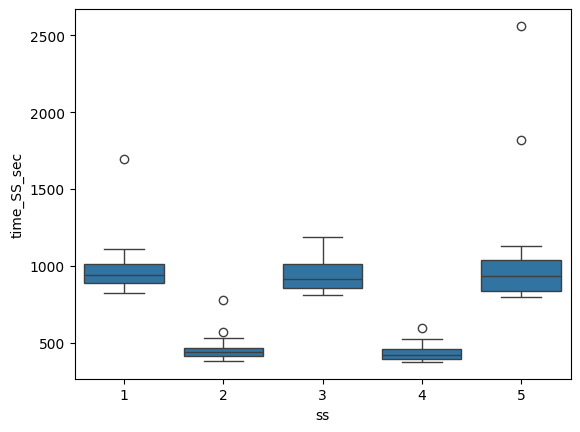

In [13]:
bplt=sns.boxplot( y=ss_times_WRC["time_SS_sec"], x=ss_times_WRC["ss"])
plt.savefig("Boxplot_" + rallyname + Group + ".png")

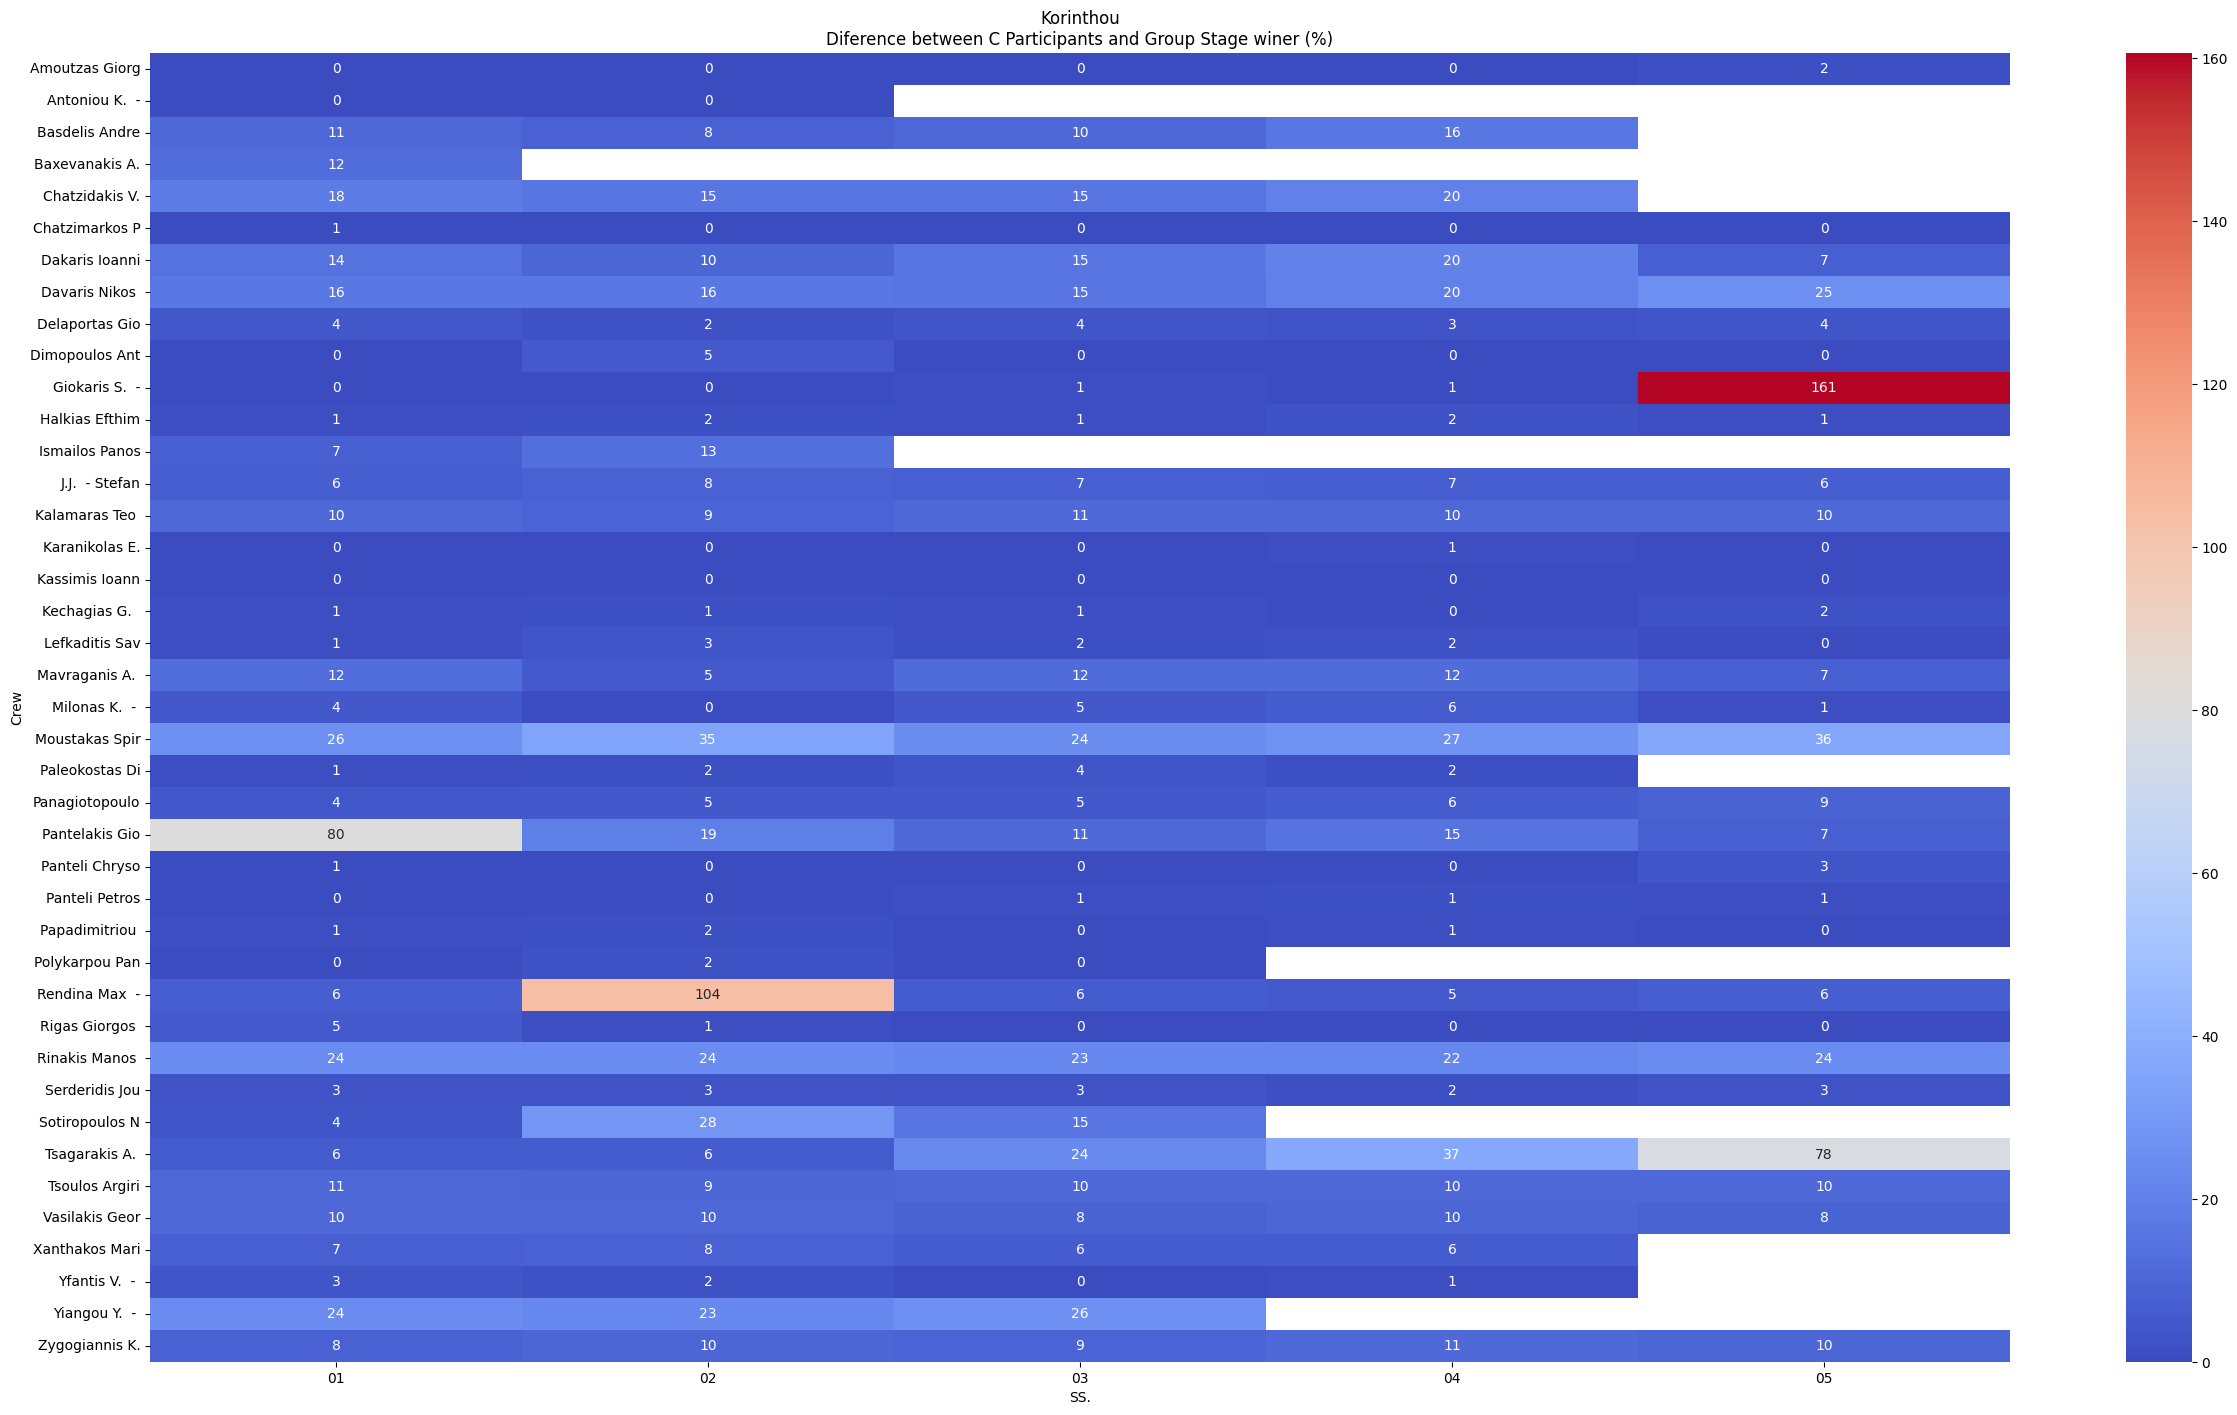

In [14]:
#ss_times_F3
fig,ax = plt.subplots()
fig.set_size_inches(30,17)
ss_timesa = pd.pivot_table(ss_times_F3, values='diff_G%', index='Crew', columns=['SS.'])
Heatmap_ = sns.heatmap(ss_timesa, annot=True, fmt=',.0f', cmap='coolwarm')
plt.title(rallyname +'\nDiference between ' + Group + ' Participants and Group Stage winer (%)')
plt.savefig(rallyname + Group + ".png")
plt.show()

In [16]:
ss_times_FIXED = ss_times_WRC.drop(ss_times_WRC[ss_times_WRC['time_SS_sec']>=1.2*ss_times_WRC['min_time_Gr']].index)
ss_times_FIXED
#ss_times_WRC

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time_Gr,min_time,diff,diff_G,diff_G%,SS.
0,Amoutzas Giorg,C1,1,Korinthou,16-06-2024,Gravel,Greek Championship,1,824.45,824.45,824.45,0.00,0.00,0.000000,01
1,Papadimitriou,C1,1,Korinthou,16-06-2024,Gravel,Greek Championship,2,830.16,824.45,824.45,5.71,5.71,0.692583,01
2,Kechagias G.,C1,1,Korinthou,16-06-2024,Gravel,Greek Championship,3,831.95,824.45,824.45,7.50,7.50,0.909697,01
3,Serderidis Jou,C1,1,Korinthou,16-06-2024,Gravel,Greek Championship,4,849.82,824.45,824.45,25.37,25.37,3.077203,01
4,Rendina Max -,C1,1,Korinthou,16-06-2024,Gravel,Greek Championship,9,876.28,824.45,824.45,51.83,51.83,6.286615,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Milonas K. -,C4,5,Korinthou,16-06-2024,Gravel,Greek Championship,19,1000.04,989.34,799.84,200.20,10.70,1.081529,05
191,Mavraganis A.,C4,5,Korinthou,16-06-2024,Gravel,Greek Championship,24,1059.49,989.34,799.84,259.65,70.15,7.090586,05
192,Dakaris Ioanni,C4,5,Korinthou,16-06-2024,Gravel,Greek Championship,25,1063.43,989.34,799.84,263.59,74.09,7.488831,05
193,Rigas Giorgos,C3,5,Korinthou,16-06-2024,Gravel,Greek Championship,21,1022.79,1022.79,799.84,222.95,0.00,0.000000,05


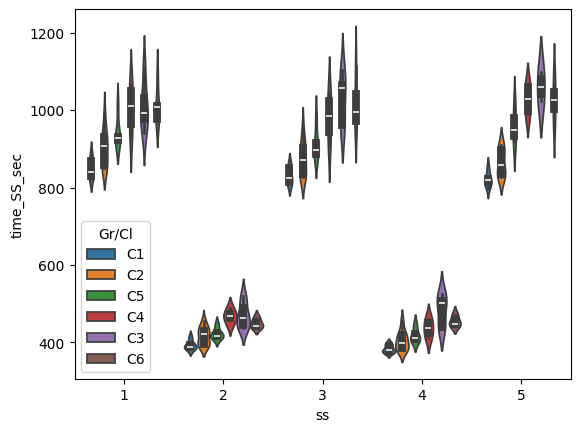

In [17]:
sns.violinplot(y=ss_times_FIXED['time_SS_sec'], x=ss_times_FIXED['ss'],hue=ss_times_FIXED['Gr/Cl'])
plt.savefig(rallyname + '_violinplot.png')

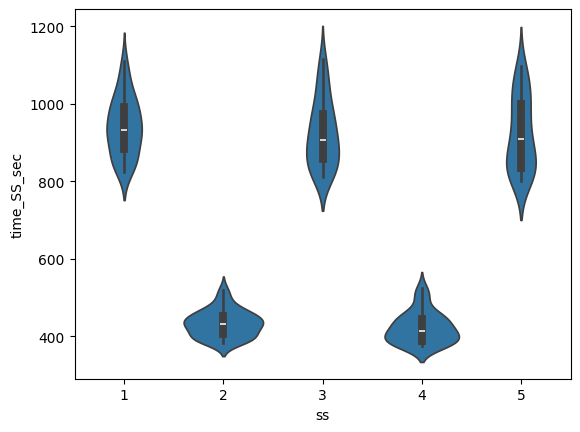

In [18]:
#sns.boxplot( y=ss_times_FIXED["time_SS_sec"], x=ss_times_FIXED["ss"])
sns.violinplot( y=ss_times_FIXED["time_SS_sec"], x=ss_times_FIXED["ss"])
plt.savefig(rallyname + '_violinplot_FIXED.png')

In [19]:
Agioi = ss_times_FIXED[(ss_times_FIXED["ss"] % 2 ==1)] #& (ss_times_FIXED["ss"] < 5)]
Pisia = ss_times_FIXED[ss_times_FIXED["ss"] % 2 == 0]
#Moschopodi = ss_times_FIXED[ss_times_FIXED["ss"] == 5]

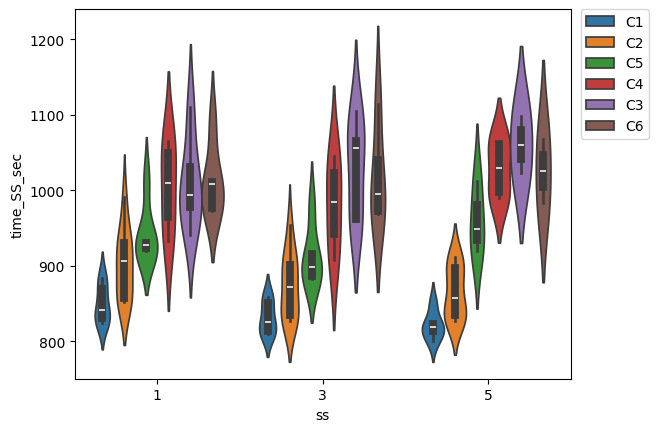

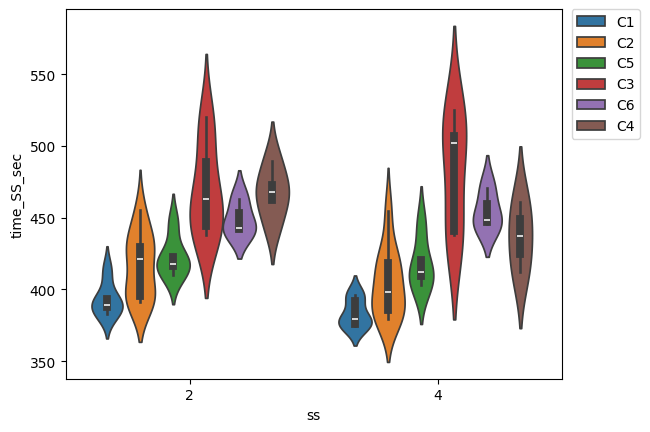

'fig.set_size_inches(30,25)\nsns.violinplot( y=Moschopodi["time_SS_sec"], x=Moschopodi["ss"], hue = Moschopodi["Gr/Cl"])\nplt.legend(bbox_to_anchor=(1.02, 1), loc=\'upper left\', borderaxespad=0)\nplt.savefig(rallyname + \'_Moschopodi_violinnplot.png\')\n'

In [20]:
fig.set_size_inches(20,15)
sns.violinplot( y=Agioi["time_SS_sec"], x=Agioi["ss"], hue = Agioi["Gr/Cl"])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig(rallyname + '_Thiva_violinplot.png')
plt.show()
fig.set_size_inches(30,20)
sns.violinplot( y=Pisia["time_SS_sec"], x=Pisia["ss"], hue = Pisia["Gr/Cl"])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig(rallyname + '_Elikonas_violinnplot.png')
plt.show()
'''fig.set_size_inches(30,25)
sns.violinplot( y=Moschopodi["time_SS_sec"], x=Moschopodi["ss"], hue = Moschopodi["Gr/Cl"])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig(rallyname + '_Moschopodi_violinnplot.png')
'''

In [21]:
Group = 'C1 - C2'
#ss_times_C6 = ss_times_F[ss_times_F['Gr/Cl'].str.contains(Group)]
ss_times_C6 = ss_times_F[ss_times_F['Gr/Cl'].str.contains('|'.join(['C1', 'C2']))]
ss_times_C6.to_csv(str(rallyname) + str(Group) + '.csv')
#ss_times_WRC.to_csv('test2a.csv')

In [22]:
ss_times_C6_F3 =ss_times_C6.drop(['Gr/Cl','time_SS_sec','cou', 'ss'], axis=1)
#ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff_G', index='Crew', columns=['Race', 'SS.'])
ss_times_C6_F4 = pd.pivot_table(ss_times_C6_F3, values='diff_G', index='Crew', columns=['SS.'])
ss_times_C6_F4

SS.,01,02,03,04,05
Crew,,,,,
Amoutzas Giorg,0.00,0.00,1.50,0.86,13.17
Chatzimarkos P,4.27,1.90,0.00,0.00,0.00
Davaris Nikos,139.35,64.05,126.25,75.16,210.89
Delaportas Gio,35.76,9.53,30.06,11.36,30.06
Halkias Efthim,6.57,6.09,7.25,7.65,7.25
Ismailos Panos,59.97,50.66,NaN,NaN,NaN
J.J. - Stefan,55.20,29.81,59.66,25.80,53.67
Karanikolas E.,0.00,0.00,3.53,3.61,3.53
Kechagias G.,7.50,4.96,8.41,0.00,18.87


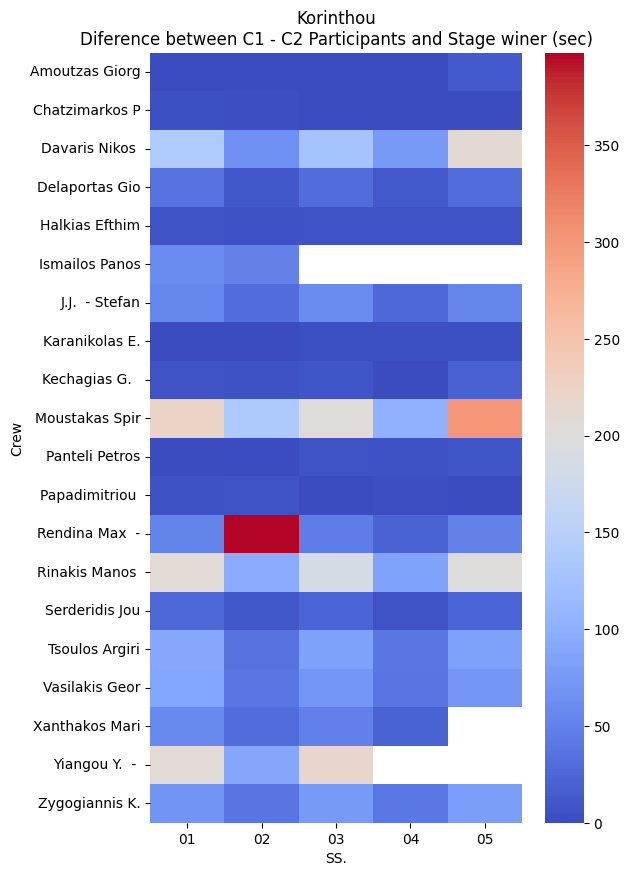

In [23]:
fig,ax = plt.subplots()
fig.set_size_inches(6,10)
Heatmap_ALL = sns.heatmap(ss_times_C6_F4, cmap='coolwarm')
plt.title(rallyname+'\nDiference between '+ Group + ' Participants and Stage winer (sec)')
plt.savefig("Heatmap_" + Group + ".png")
plt.show()

In [24]:
min_value_overall = rally_overall.groupby(['Race', 'ss'])['time'].min()
min_value_overall_G = rally_overall.groupby(['Race', 'ss', 'Gr/Cl'])['time'].min()
#min_value = pd.DataFrame(min_value)

min_value_overall_2 =  pd.DataFrame(min_value_overall)
min_value_overall_2_G =  pd.DataFrame(min_value_overall_G)

min_value_overall_2_G = min_value_overall_2_G.rename(columns={'time' : 'min_time_Gr'})
min_value_overall_2 = min_value_overall_2.rename(columns={'time' : 'min_time'})
min_value_overall_2_G

min_time_Gr
Race      ss Gr/Cl             
Korinthou 1  2          1071.89
             4          1089.72
             C1          824.45
             C2          851.49
             C3          941.22
             C4          932.93
             C5          918.86
             C6          972.95
          2  2          1575.35
             4          1568.70
             C1         1207.25
             C2         1242.85
             C3         1370.83
             C4         1419.64
             C5         1296.41
             C6         1400.56
          3  2          2679.07
             4          2686.02
             C1         2018.56
             C2         2073.45
             C3         2389.53
             C4         2281.25
             C5         2219.06
             C6         2399.57
          4  2          3134.85
             4          3273.81
             C1         2393.98
             C2         2455.57
             C3         2827.26
             C4         2673.56
             C5         2623.12
             C6         2854.21
          5  2          4276.79
             4          4250.92
             C1         3206.36
             C2         3282.64
             C3         3892.17
             C4         3810.17
             C5         3680.49
             C6         3758.88

In [25]:
ss_times_F_G_overall = rally_overall.merge(min_value_overall_2_G, on=['Race', 'ss', 'Gr/Cl'])
ss_times_F_overall = ss_times_F_G_overall.merge(min_value2, on=['Race', 'ss'])
ss_times_F_overall['diff']=ss_times_F_overall['time'] - ss_times_F_overall['min_time']
ss_times_F_overall['diff_G']=ss_times_F_overall['time'] - ss_times_F_overall['min_time_Gr']
ss_times_F_overall['diff_G%']=(ss_times_F_overall['time'] - ss_times_F_overall['min_time_Gr'])/ss_times_F_overall['min_time_Gr']*100
ss_times_F_overall['SS.']=ss_times_F_overall['ss'].apply(lambda x: '{0:0>2}'.format(x))
ss_times_F_overall

,Pos.,No,Crew,Gr/Cl,total_time,Diff,Speed,ss,Race,date,...,Penalty_s,Diff_1st,Diff_Pre,time,min_time_Gr,min_time,diff,diff_G,diff_G%,SS.
0,1.0,#3,Amoutzas Giorg,C1,13:44.45,0,79.5,1,Korinthou,16-06-2024,...,0.0,0,0,824.45,824.45,824.45,0.00,0.00,0.000000,01
1,2.0,#2,Papadimitriou,C1,13:50.16,+5.71 +5.71,79.0 0.31,1,Korinthou,16-06-2024,...,0.0,5.71,+5.71,830.16,824.45,824.45,5.71,5.71,0.692583,01
2,3.0,#4,Kechagias G.,C1,13:51.95,+7.50 +1.79,78.8 0.41,1,Korinthou,16-06-2024,...,0.0,7.50,+1.79,831.95,824.45,824.45,7.50,7.50,0.909697,01
3,4.0,#1,Serderidis Jou,C1,14:09.82,+25.37 +17.87,77.1 1.39,1,Korinthou,16-06-2024,...,0.0,25.37,+17.87,849.82,824.45,824.45,25.37,25.37,3.077203,01
4,9.0,#5,Rendina Max -,C1,14:36.28,+51.83 +18.22,74.8 2.85,1,Korinthou,16-06-2024,...,0.0,51.83,+18.22,876.28,824.45,824.45,51.83,51.83,6.286615,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,27. +4,#38,Pantelakis Gio,C3,1:10:41.79,+17:15.43 +3.83,60.9 14.4,5,Korinthou,16-06-2024,...,0.0,17:15.43,+3.83,4241.79,3892.17,799.84,3441.95,349.62,8.982650,05
195,32. +5,#34,Tsagarakis A.,C3,1:26:42.35 2:20,+33:15.99 +5:17.94,51.0 27.8,5,Korinthou,16-06-2024,...,20.0,33:15.99,+5:17.94,5202.35,3892.17,799.84,4402.51,1310.18,33.661942,05
196,28. +4,#49,Dodos Giorgos,4,1:10:50.92,+17:24.56 +9.13,60.7 14.6,5,Korinthou,16-06-2024,...,0.0,17:24.56,+9.13,4250.92,4250.92,799.84,3451.08,0.00,0.000000,05
197,29. +4,#48,Vassilopoulos,2,1:11:16.79,+17:50.43 +25.87,60.4 14.9,5,Korinthou,16-06-2024,...,0.0,17:50.43,+25.87,4276.79,4276.79,799.84,3476.95,0.00,0.000000,05


In [26]:
Group = 'C'
#ss_times_WRC = ss_times_F[ss_times_F['Gr/Cl'].str.contains(Group)]
ss_times_combine = ss_times_F_overall[ss_times_F_overall['Gr/Cl'].str.contains('|'.join(['C1', 'C2', 'C3', 'C4', 'C5', 'C6']))]
ss_times_combine.to_csv(str(rallyname) + str(Group) + '_classification.csv')
ss_times_combine.columns

Index(['Pos.', 'No', 'Crew', 'Gr/Cl', 'total_time', 'Diff', 'Speed', 'ss',
       'Race', 'date', 'surface', 'competition', 'cPos', 'Stages_time',
       'Penalty', 'Stages_t_s', 'Stages_t_m', 'Stages_t_h', 'Penalty_m',
       'Penalty_s', 'Diff_1st', 'Diff_Pre', 'time', 'min_time_Gr', 'min_time',
       'diff', 'diff_G', 'diff_G%', 'SS.'],
      dtype='object')

In [27]:
ss_times_F3_overall =ss_times_combine.drop(['Gr/Cl','time','cPos', 'ss'], axis=1)
ss_times_F4_group = pd.pivot_table(ss_times_F3_overall, values='diff_G', index='Crew', columns=['SS.'])
ss_times_F4_overall = pd.pivot_table(ss_times_F3_overall, values='diff', index='Crew', columns=['SS.'])
ss_times_F4_overall

SS.,01,02,03,04,05
Crew,,,,,
Amoutzas Giorg,0.00,824.45,1219.30,2031.96,2407.15
Antoniou K. -,116.77,988.03,NaN,NaN,NaN
Basdelis Andre,217.01,1130.65,1825.66,2869.93,NaN
Baxevanakis A.,265.15,NaN,NaN,NaN,NaN
Chatzidakis V.,285.68,1221.11,1880.29,2909.61,NaN
Chatzimarkos P,31.31,866.22,1263.64,2081.01,2482.80
Dakaris Ioanni,240.09,1192.10,1823.59,2740.06,3307.70
Davaris Nikos,166.39,1063.45,1572.33,2533.42,3228.16
Delaportas Gio,62.80,905.34,1345.01,2161.55,2700.77


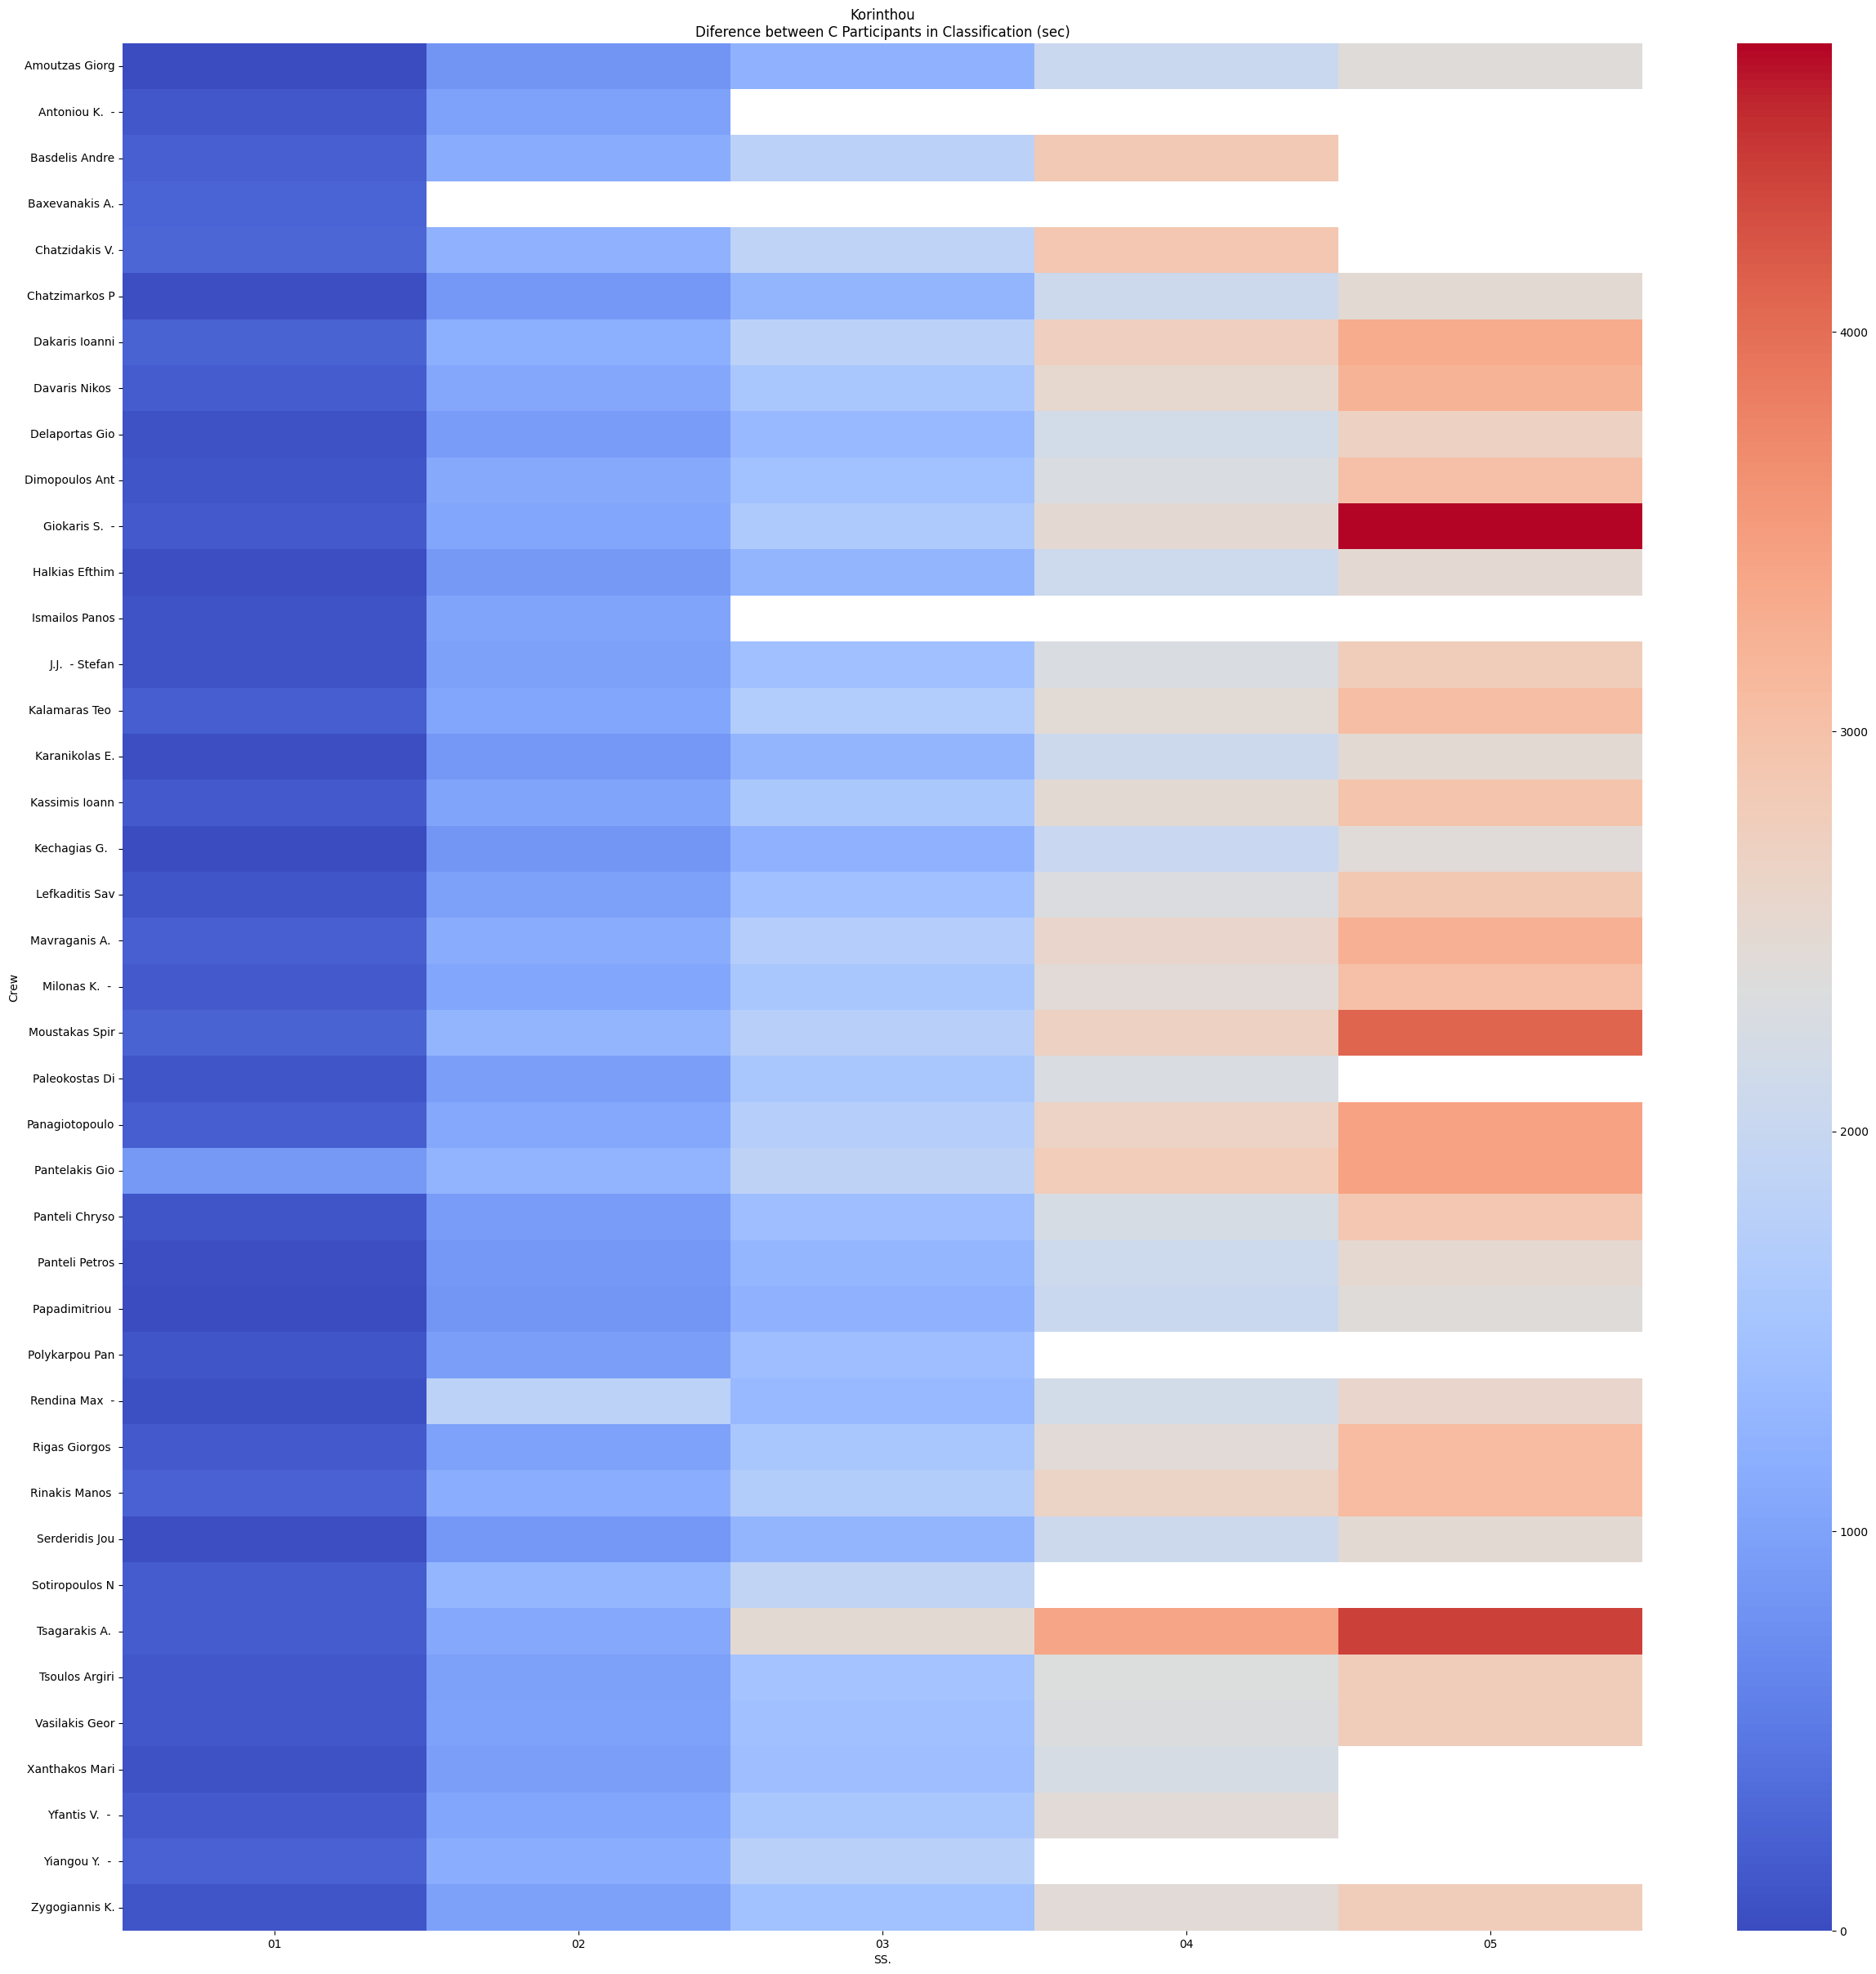

In [28]:
fig,ax = plt.subplots()
fig.set_size_inches(30,30)
Heatmap_ALL = sns.heatmap(ss_times_F4_overall, cmap='coolwarm')
plt.title(rallyname+'\nDiference between '+ Group + ' Participants in Classification (sec)')
plt.savefig("Classification_Heatmap_" + Group + rallyname + ".png")
plt.show()

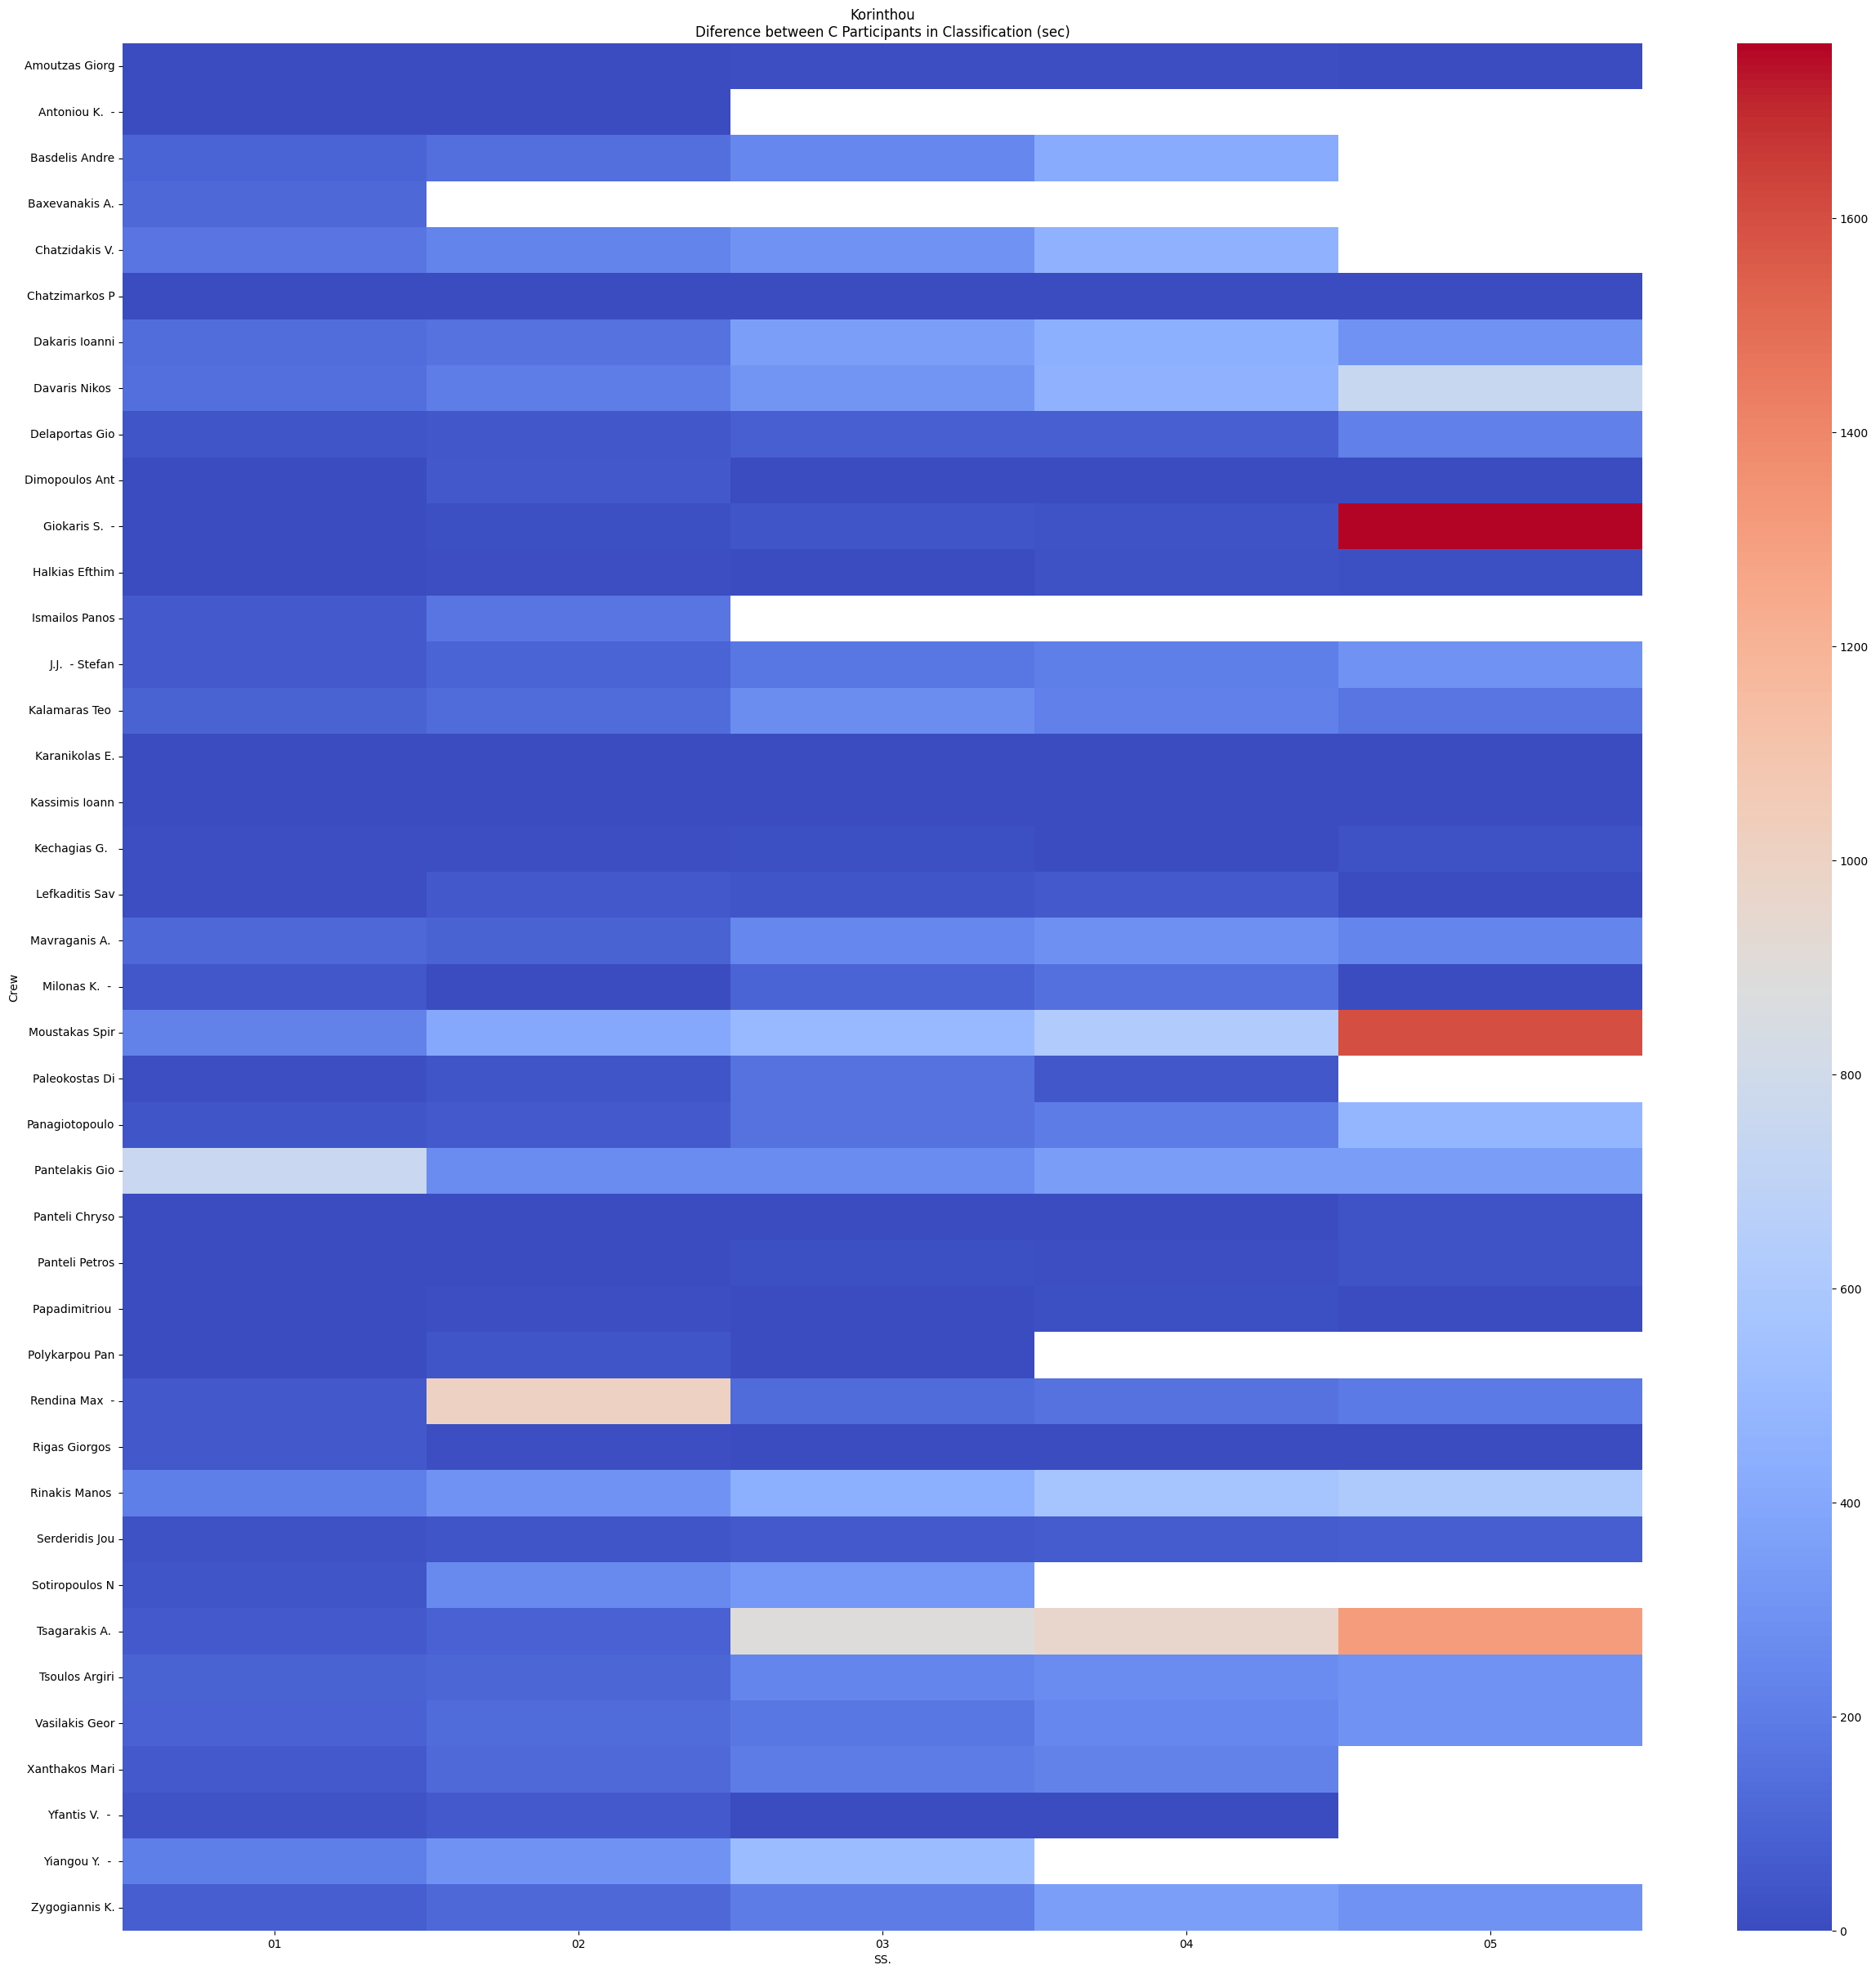

In [29]:
fig,ax = plt.subplots()
fig.set_size_inches(30,30)
Heatmap_ALL = sns.heatmap(ss_times_F4_group, cmap='coolwarm')
plt.title(rallyname+'\nDiference between '+ Group + ' Participants in Classification (sec)')
plt.savefig("Classification_Heatmap_Group" + Group + rallyname + ".png")
plt.show()